In [9]:
# Задача 4.1.
# Используя стандартные средства opencv сохраните изображения сгенерированного набора данных в форматах .png, .jpg, .bmp.
# Выполните чтение сохраненных данных из файла.
# При помощи метрик SSIM, MSE сравните данные.
# Задача 4.2.1.
# Реализуйте алгоритмы downsampling:
#  - max
#  - среднее на выбор ( не average)
# Задача 4.2.2.
# Реализуйте алгоритм Ланцоша для восстановления разрешения исходного изображения.
# При помощи метрик SSIM, MSE сравните исходное изображение и восстановленное в исходном разрешении.


=== Изображение 1 ===
Оригиналы в разных форматах:


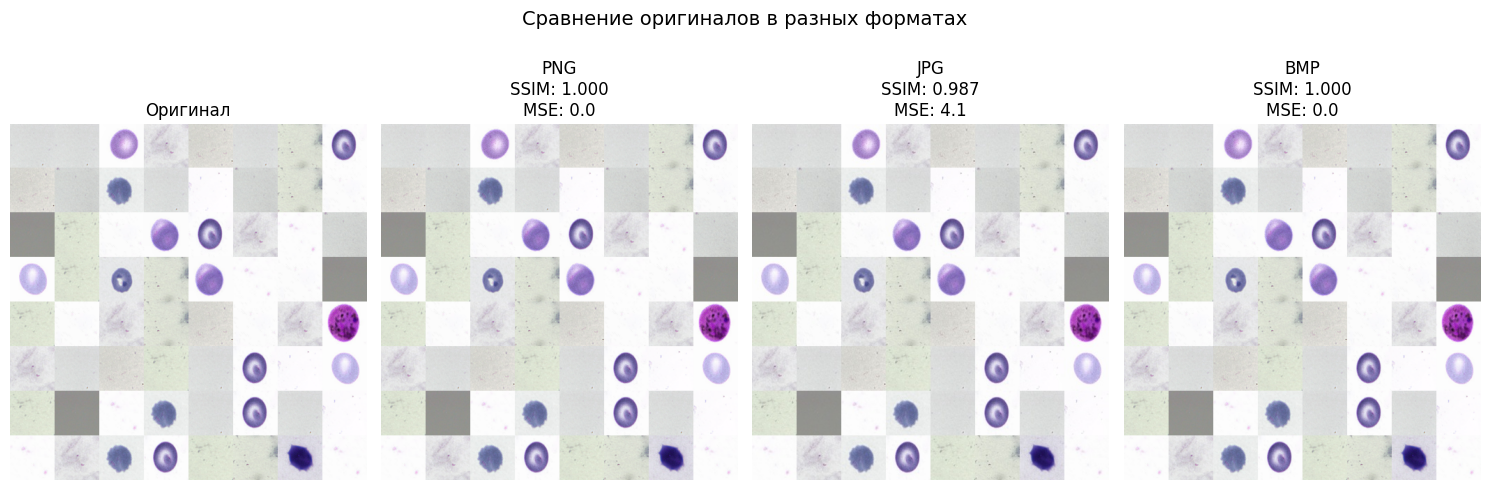


Даунсемплированные версии:


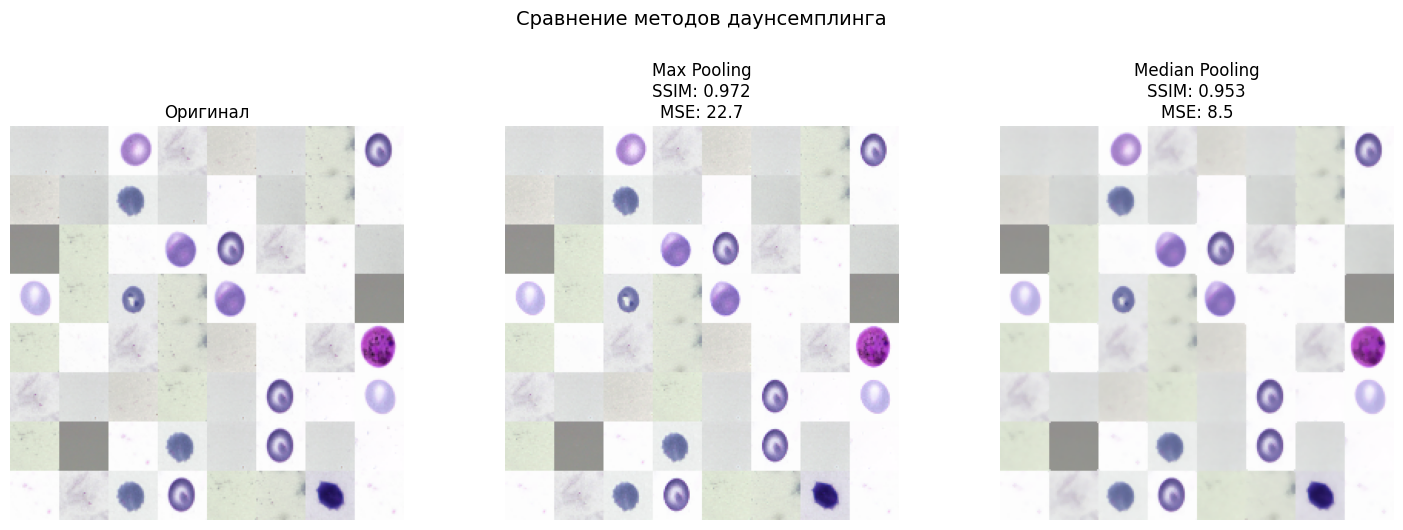


Восстановленные версии:


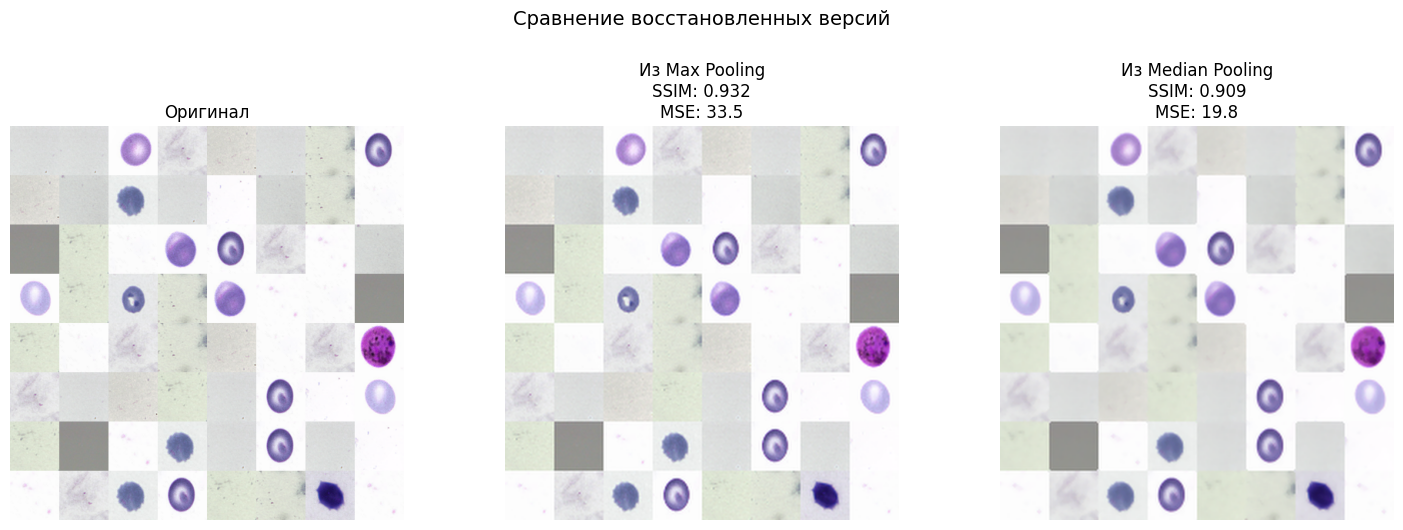


=== Изображение 2 ===
Оригиналы в разных форматах:


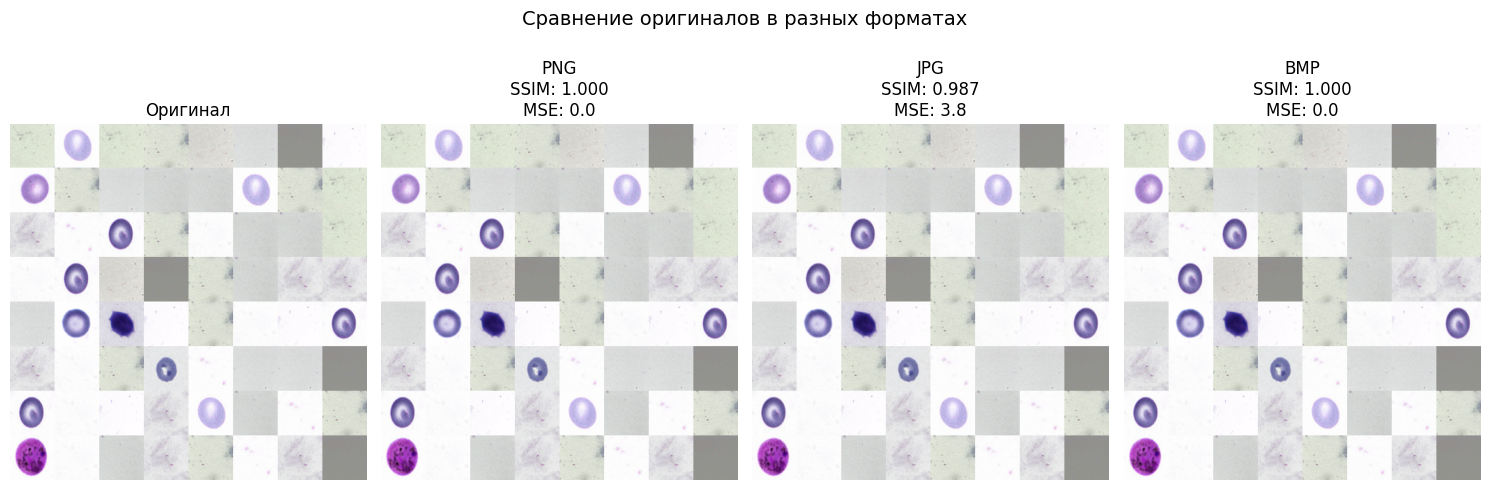


Даунсемплированные версии:


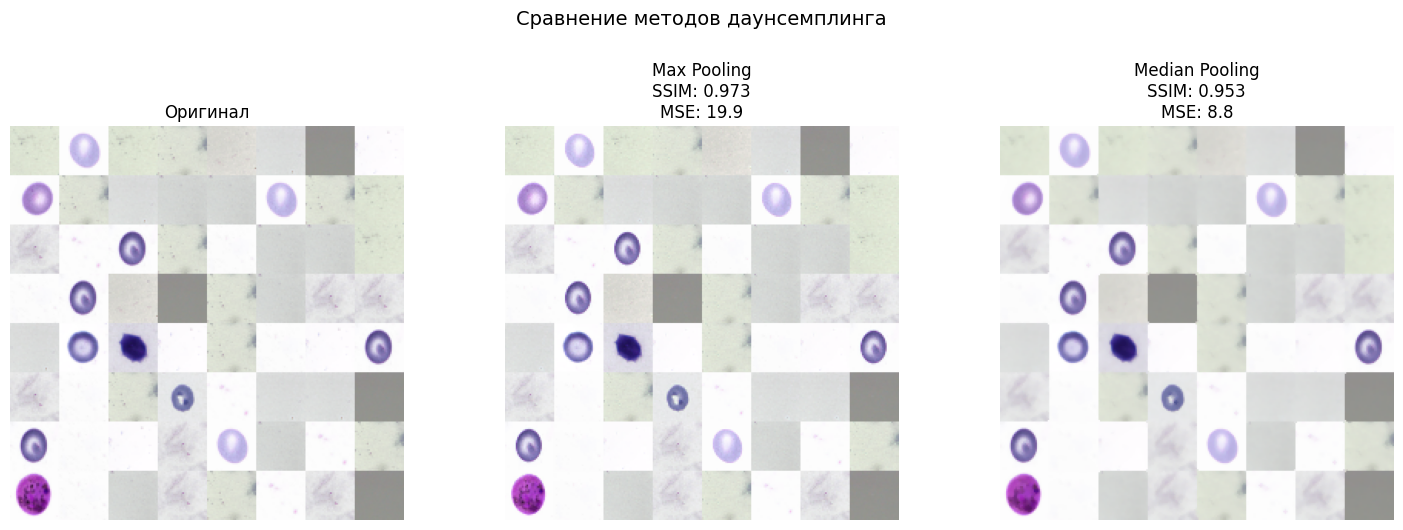


Восстановленные версии:


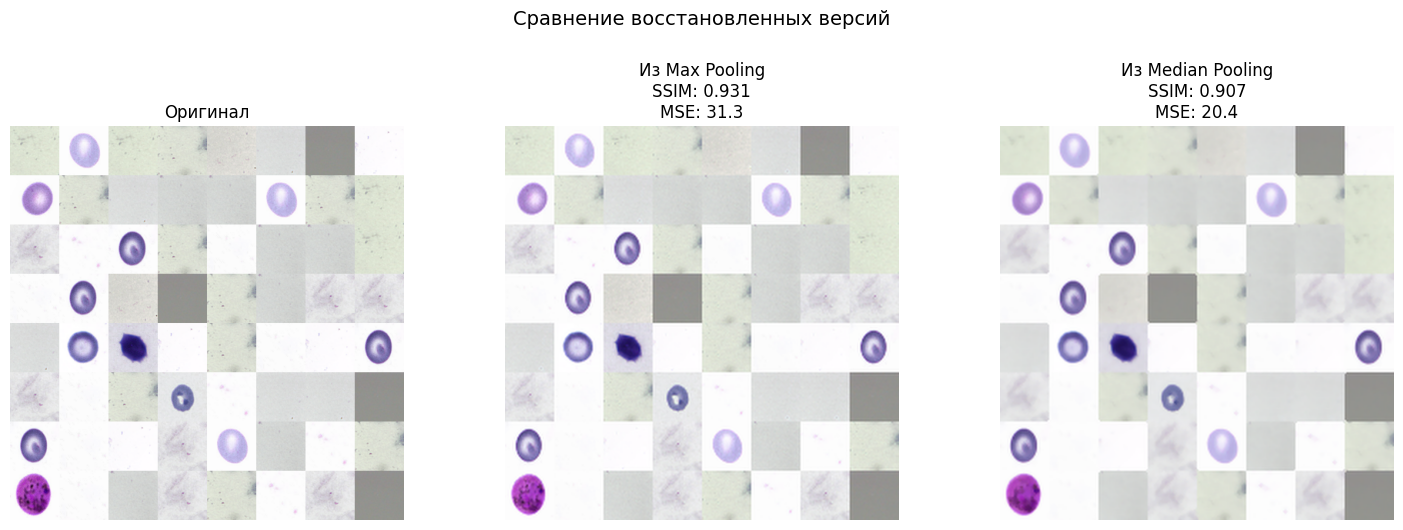


=== Изображение 3 ===
Оригиналы в разных форматах:


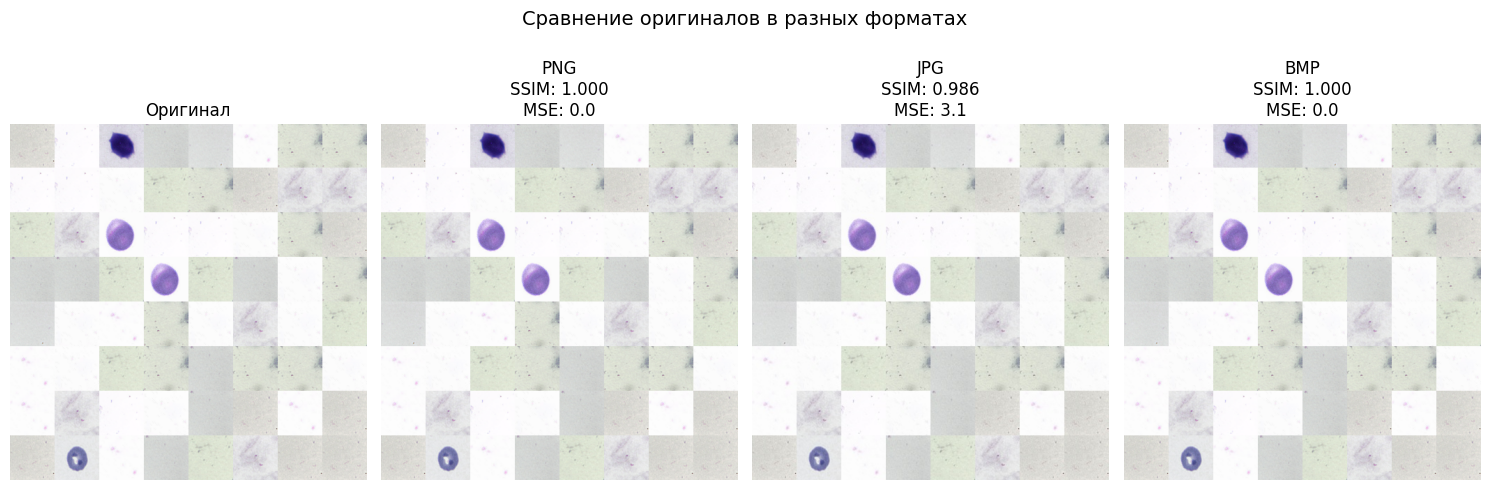


Даунсемплированные версии:


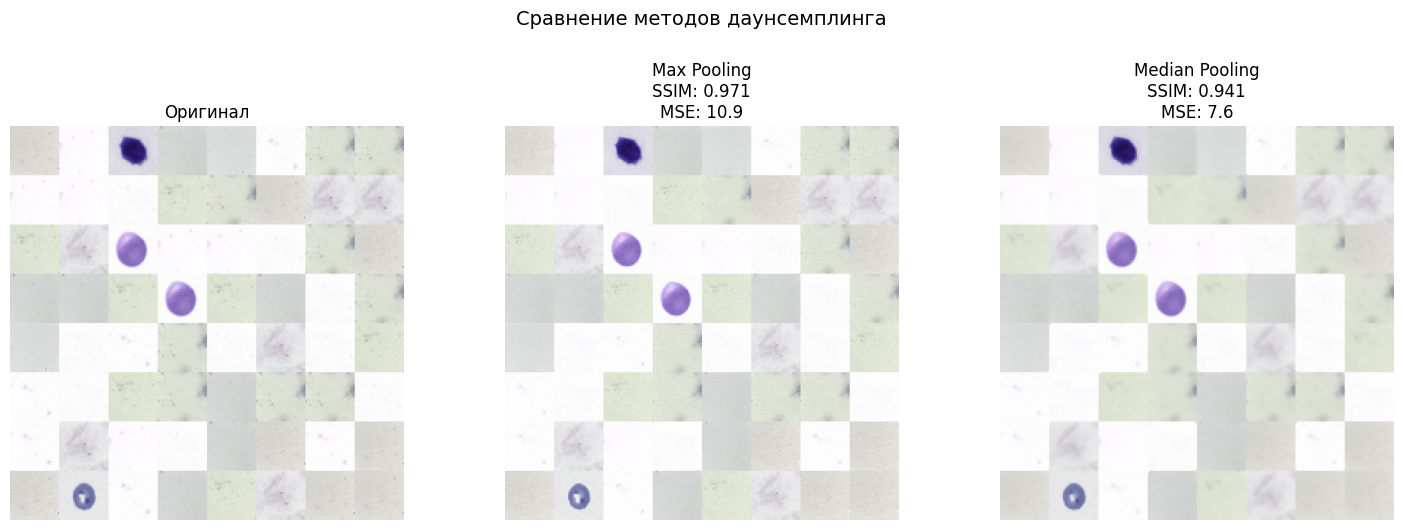


Восстановленные версии:


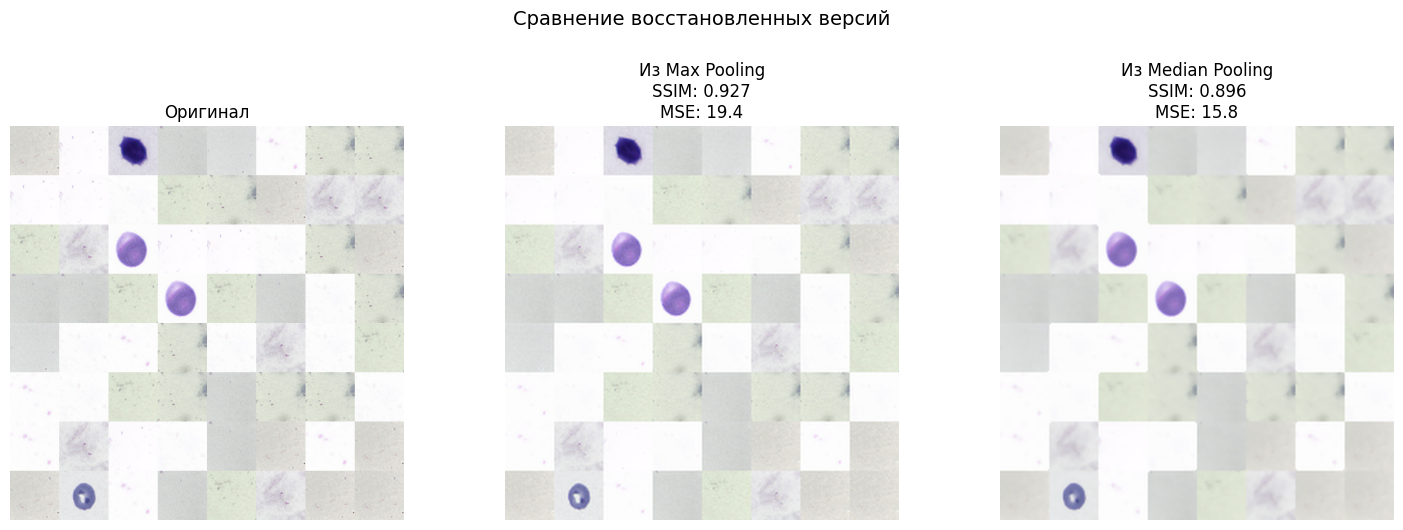


=== Изображение 4 ===
Оригиналы в разных форматах:


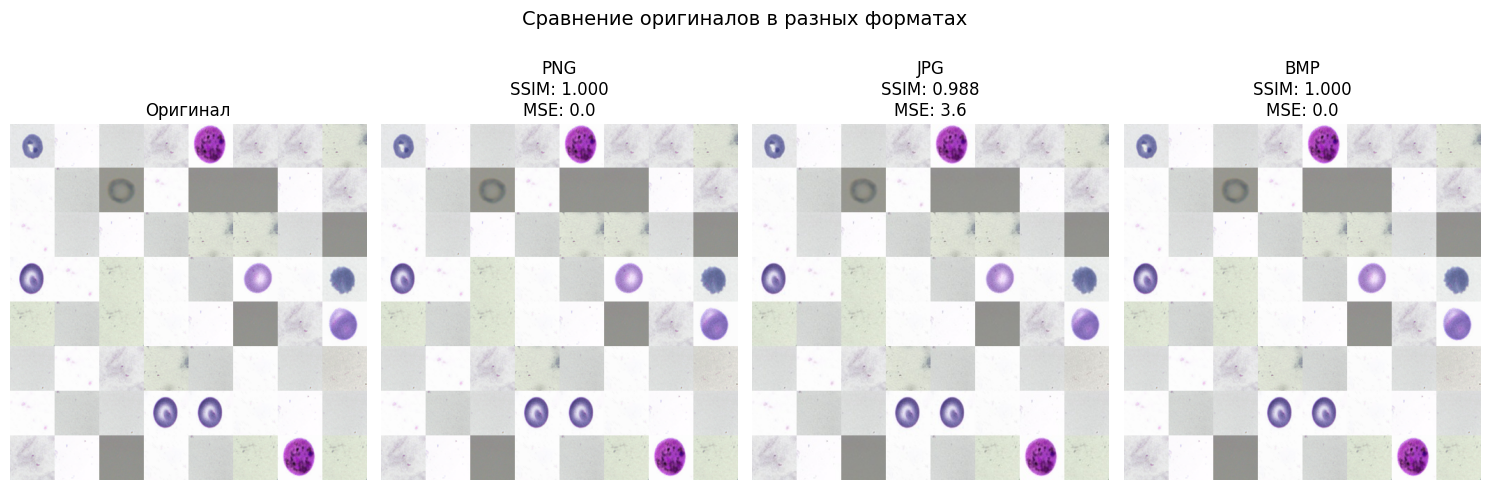


Даунсемплированные версии:


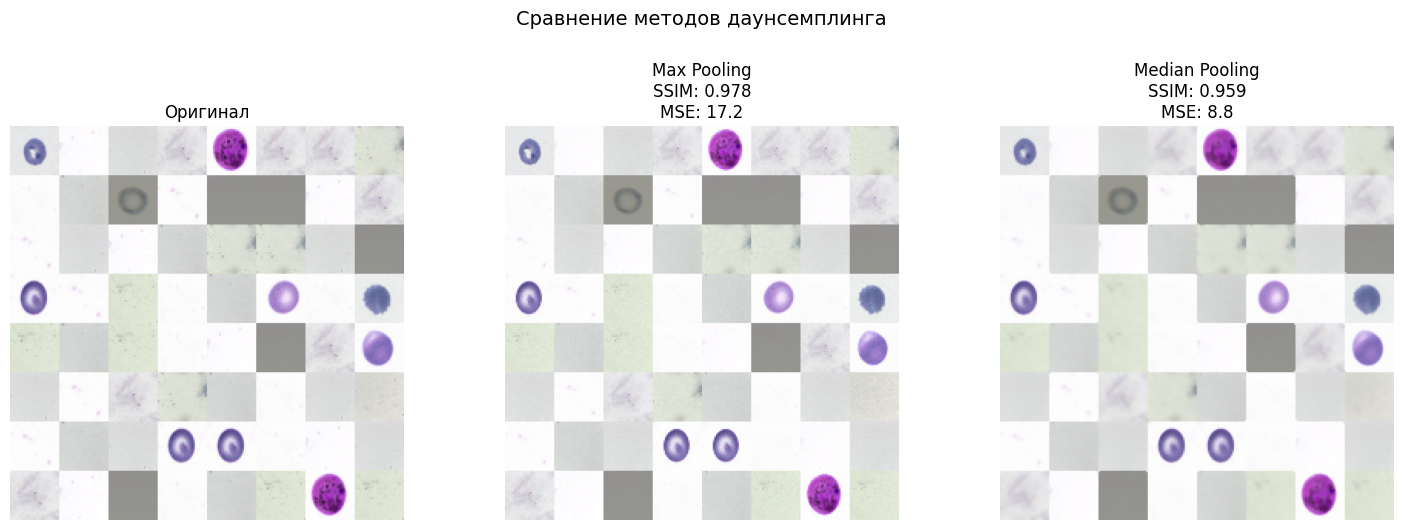


Восстановленные версии:


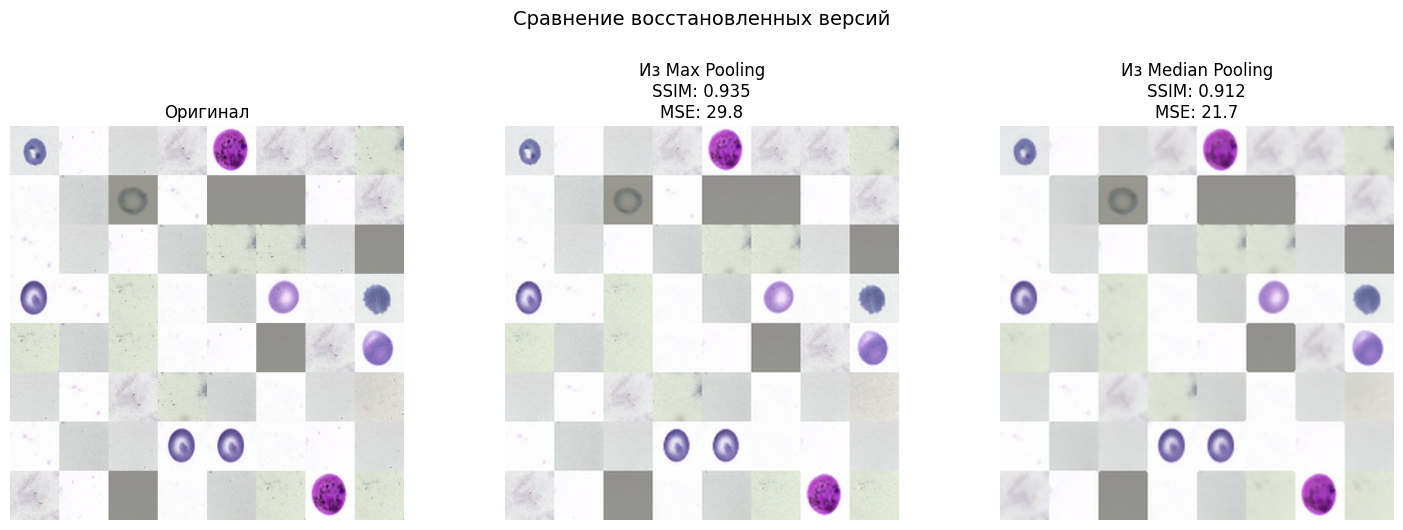


=== Изображение 5 ===
Оригиналы в разных форматах:


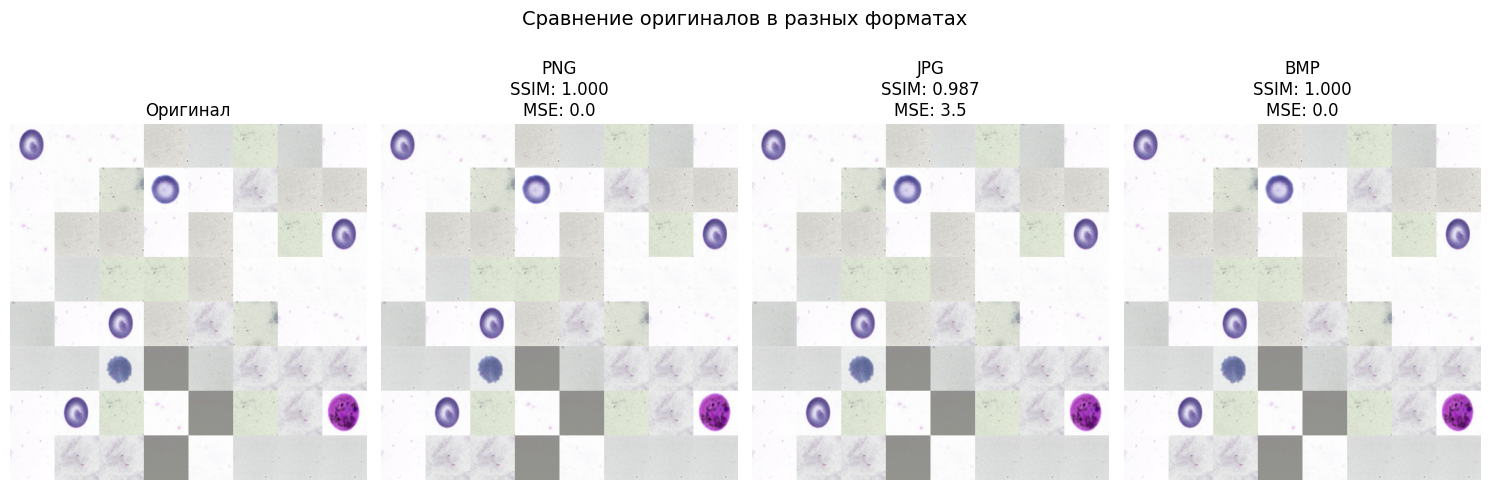


Даунсемплированные версии:


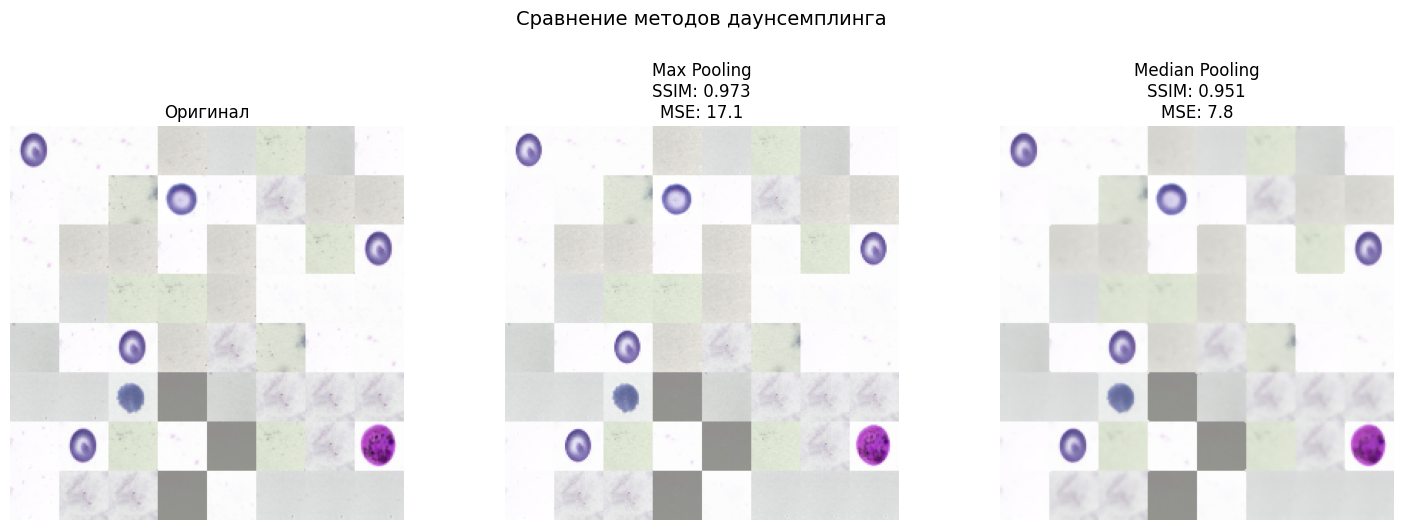


Восстановленные версии:


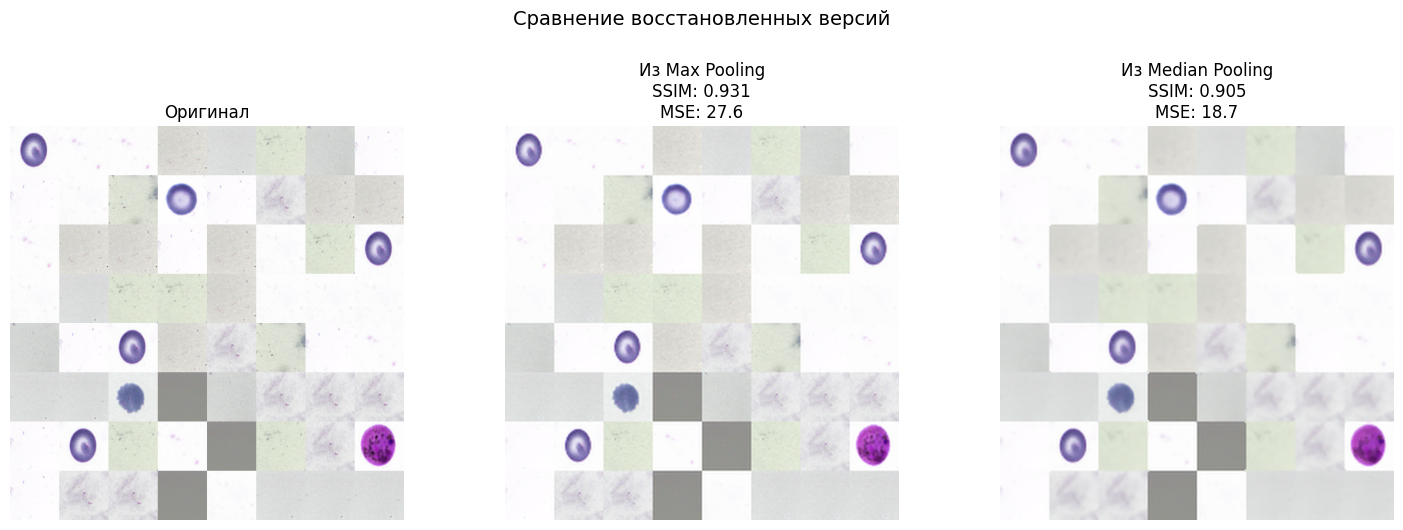

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim, mean_squared_error

def create_directory(path):
    """Создает директорию, если она не существует"""
    if not os.path.exists(path):
        os.makedirs(path)

def compare_images(img1, img2):
    """Сравнивает два изображения с помощью SSIM и MSE"""
    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    
    if len(img1.shape) == 3:
        img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    else:
        img1_gray = img1
        img2_gray = img2
    
    ssim_value = ssim(img1_gray, img2_gray)
    mse_value = mean_squared_error(img1, img2)
    
    return ssim_value, mse_value

def downsample_max(img, scale_factor=2):
    """Downsampling с использованием максимума в области"""
    h, w = img.shape[:2]
    new_h, new_w = h // scale_factor, w // scale_factor
    
    if len(img.shape) == 3:
        downsampled = np.zeros((new_h, new_w, img.shape[2]), dtype=img.dtype)
        for c in range(img.shape[2]):
            for i in range(new_h):
                for j in range(new_w):
                    region = img[i*scale_factor:(i+1)*scale_factor, 
                              j*scale_factor:(j+1)*scale_factor, c]
                    downsampled[i, j, c] = np.max(region)
    else:
        downsampled = np.zeros((new_h, new_w), dtype=img.dtype)
        for i in range(new_h):
            for j in range(new_w):
                region = img[i*scale_factor:(i+1)*scale_factor, 
                          j*scale_factor:(j+1)*scale_factor]
                downsampled[i, j] = np.max(region)
    
    return downsampled

def downsample_median(img, scale_factor=2):
    """Downsampling с использованием медианы в области"""
    # Сначала уменьшаем размер, затем применяем медианный фильтр
    small = cv2.resize(img, (img.shape[1]//scale_factor, img.shape[0]//scale_factor), 
                     interpolation=cv2.INTER_AREA)
    return cv2.medianBlur(small, 3)

def display_comparison(original, images_list, titles_list, group_title):
    """Отображает группу изображений с метриками"""
    plt.figure(figsize=(15, 5))
    
    
    plt.subplot(1, len(images_list)+1, 1)
    if len(original.shape) == 2:
        plt.imshow(original, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Оригинал")
    plt.axis('off')
    
    
    for i, (img, title) in enumerate(zip(images_list, titles_list)):
        plt.subplot(1, len(images_list)+1, i+2)
        
        if len(img.shape) == 2:
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        
        # Вычисляем метрики
        ssim_val, mse_val = compare_images(original, img)
        plt.title(f"{title}\nSSIM: {ssim_val:.3f}\nMSE: {mse_val:.1f}")
        plt.axis('off')
    
    plt.suptitle(group_title, fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()

def process_images():
    """Основная функция обработки изображений"""
    input_dir = 'blood_cells/dataset/clear'
    output_dir = 'task4/dataset'
    create_directory(output_dir)
    scale_factor = 2
    
    for i in range(1, 6):
        input_path = os.path.join(input_dir, f'clear_image_{i}.png')
        if not os.path.exists(input_path):
            print(f"Файл {input_path} не найден, пропускаем...")
            continue
            
        original = cv2.imread(input_path)
        if original is None:
            print(f"Не удалось загрузить {input_path}, пропускаем...")
            continue
        
        # 1. Оригиналы в разных форматах
        png_path = os.path.join(output_dir, f'image_{i}.png')
        jpg_path = os.path.join(output_dir, f'image_{i}.jpg')
        bmp_path = os.path.join(output_dir, f'image_{i}.bmp')
        
        cv2.imwrite(png_path, original)
        cv2.imwrite(jpg_path, original, [int(cv2.IMWRITE_JPEG_QUALITY), 95])
        cv2.imwrite(bmp_path, original)
        
        png_img = cv2.imread(png_path)
        jpg_img = cv2.imread(jpg_path)
        bmp_img = cv2.imread(bmp_path)
        
        print(f"\n=== Изображение {i} ===")
        print("Оригиналы в разных форматах:")
        display_comparison(
            original, 
            [png_img, jpg_img, bmp_img],
            ["PNG", "JPG", "BMP"],
            "Сравнение оригиналов в разных форматах"
        )
        
        # 2. Даунсемплированные версии
        down_max = downsample_max(original, scale_factor)
        down_median = downsample_median(original, scale_factor)
        
        original_small = cv2.resize(original, (down_max.shape[1], down_max.shape[0]))
        
        print("\nДаунсемплированные версии:")
        display_comparison(
            original_small,
            [down_max, down_median],
            ["Max Pooling", "Median Pooling"],
            "Сравнение методов даунсемплинга"
        )
        
        # 3. Восстановленные через Ланцоша
        restored_max = cv2.resize(down_max, (original.shape[1], original.shape[0]), 
                               interpolation=cv2.INTER_LANCZOS4)
        restored_median = cv2.resize(down_median, (original.shape[1], original.shape[0]), 
                                interpolation=cv2.INTER_LANCZOS4)
        
        print("\nВосстановленные версии:")
        display_comparison(
            original,
            [restored_max, restored_median],
            ["Из Max Pooling", "Из Median Pooling"],
            "Сравнение восстановленных версий"
        )

if __name__ == "__main__":
    process_images()